# Data Mining Challenge 2020

## Team
* First-name Last-name Student-ID
* ...



# section one 
apply the desired libraries 

In [1]:
import pandas as pd
import numpy as np

# Statistical libraries
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.preprocessing import power_transform

# Section two
Defin the functions that we will use through out our code 

In [4]:
# print the confusion Matrix
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=-1):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])    

def PrintSignificance(stat, c):
    if (stat[1]<(1-c)):
        print("The difference is statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))
    else:
        print("The difference is not statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))    

In [5]:
# model training 
def train_model(methods, x_t,y_t, x_te, y_te):
    xval_results = {}
    roc_results = {}
    feature_importance_model = {}

    method = []
    accuracy_mean = []
    accuracy_std = []
    precision = []
    recall = []
    f1 = []
    auc = []

    for method_name in methods:


        clf = methods[method_name];

        # evaluate the model using crossvalidation
        xval_score = cross_val_score(clf,X,y,cv=crossvalidation)

        # store the raw results of crossvalidation that we might want to use for t-test/mann-whitney comparison
        xval_results[method_name] = xval_score

        # compute the basic statistics
        accuracy_mean.append(np.average(xval_score))
        accuracy_std.append(np.std(xval_score))

        clf.fit(x_t,y_t)

        # if the mode can return an evaluation of feature importance we store it to analyze it later
        if hasattr(clf, 'feature_importances_'):
                feature_importance_model[method_name] = (clf,clf.feature_importances_)

        # compute the prediction which, for probabilistic classifiers, is using a threshold of 0.5
        yp = clf.predict(x_te)

        # ask for the probability values
        yprob = clf.predict_proba(x_te)

        # computes the data needed to draw the ROC curve
        fpr_nb, tpr_nb, thresholds = roc_curve(y_true=y_te, y_score = yprob[:,1], pos_label=1)

        # computes the AUC 
        roc_auc = roc_auc_score(y_true=y_te, y_score = yprob[:,1])
        auc.append(roc_auc)

        # store the information to plot the ROC curves afterwards
        roc_results[method_name] = (fpr_nb, tpr_nb, thresholds, roc_auc)

        precision.append(precision_score(y_te,yp))
        recall.append(recall_score(y_te,yp))
        f1.append(f1_score(y_te, yp))

        print("%40s"%method_name)
        print("========================================")
        print("\t  Accuracy (CV) %.3f %.3f"%(np.average(xval_score),np.std(xval_score)))
        print("\tAccuracy (Test) %.3f"%precision_score(y_test, yp))
        print("\t      Precision %.3f"%precision_score(y_test, yp))
        print("\t      Recall    %.3f"%recall_score(y_test, yp))
        print("\t      F1        %.3f"%f1_score(y_test, yp))
        print("\n")

        method.append(method_name)

This function print all the datas 

In [6]:
def print_all (to_print):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(to_print)

In [7]:
def print_his(dat0a, bins):
    hist1 = sns.distplot(data,bins=bins)

In [28]:
def new_numerical_df(numerical_dic, Numerical_df):
  i = 0
  while(i<len(numerical_dic)):
    if list(numerical_dic.keys())[i] == 'aircon_sum_wo_prev':
      index=2
    else:
      index = 3
    
    df_new = Numerical_df[Numerical_df.columns[(list(numerical_dic.values())[i]):(list(numerical_dic.values())[i]+index)]]
    Numerical_df[list(numerical_dic.keys())[i]] = df_new.mean(axis=1)

    i= i+1


  Numerical_df = Numerical_df.drop(columns = ['aircon_sum_wo_prev7d','aircon_sum_wo_prev14d'])
  Numerical_df=Numerical_df.drop(Numerical_df.columns.to_series()['mean_temperature_prev7d':'min_pressure_f_next7d'], axis=1)
  return Numerical_df


# Section Three 
Apply data preprocessing we can see that the categorical datas are already One-Hot encoded 

### 3.1 loading the data and split test and train

In [8]:
# load the data
df = pd.read_csv('train.csv')

### 3.2 Data Quality assurnace 
we should check for:

3.2.1- null and missing values 

3.2.2- inconsistant values 

3.2.3- duplicates

In [9]:
# check for the null 
df.isnull().sum().sum()

0

we see that there are no NaN values

In [10]:
# remove the duplicates if any 
df.drop_duplicates()
# drop the unused columns
df = df.drop(columns=['SITE_ID','DATE'])

we the commad above we have no duplicates if any 

Now we check for inconsistent values
First we take the range and variance for each column 

In [11]:
col_max = df.max(axis=0)

In [12]:
col_min = df.min(axis=0)

In [13]:
df_range = col_max - col_min
print_all(df_range.sort_values())

CELL_TYPE_TRP                              0.00
CELL_TYPE_Macro                            1.00
aircon_sum_target_next14d                  1.00
GEOGRAPHIC_CLUSTER_K_9                     1.00
GEOGRAPHIC_CLUSTER_K_8                     1.00
GEOGRAPHIC_CLUSTER_K_6                     1.00
GEOGRAPHIC_CLUSTER_K_5                     1.00
GEOGRAPHIC_CLUSTER_K_4                     1.00
GEOGRAPHIC_CLUSTER_K_3                     1.00
GEOGRAPHIC_CLUSTER_K_7                     1.00
GEOGRAPHIC_CLUSTER_K_1                     1.00
GEOGRAPHIC_CLUSTER_K_2                     1.00
CELL_TYPE_Tx site                          1.00
CELL_TYPE_micro                            1.00
CELL_TYPE_Mobil                            1.00
GEOGRAPHIC_CLUSTER_K_0                     1.00
skew_fire/smoke_alarms_prev14d             5.65
aircon_sum_wo_prev7d                       6.00
min_rain_mm_f_next14d                      7.60
skew_temperature_alarms_prev14d            7.61
aircon_sum_wo_prev14d                   

we see that CELL_TYPE_TRP is always zero so it is useless to have it in our datas so we drop it

In [14]:
df = df.drop(columns = ['CELL_TYPE_TRP'])

In [15]:
df_mean = df.mean()
print_all(df_mean.sort_values())

kurt_fire/smoke_alarms_prev14d           -1.207066
kurt_ge_alarms_prev14d                   -1.205633
kurt_temperature_alarms_prev14d          -1.196703
kurt_equipment_alarms_prev14d            -1.187480
kurt_power_alarms_prev14d                -1.159289
skew_power_alarms_prev14d                -0.000018
skew_ge_alarms_prev14d                    0.000002
skew_fire/smoke_alarms_prev14d            0.000071
skew_equipment_alarms_prev14d             0.000173
skew_temperature_alarms_prev14d           0.000369
CELL_TYPE_Mobil                           0.000966
ge_min_persistance_prev7d                 0.001619
aircon_sum_wo_prev7d                      0.003948
aircon_sum_target_next14d                 0.005767
aircon_sum_wo_prev14d                     0.007914
ge_min_persistance_prev3d                 0.023221
min_rain_mm_f_next14d                     0.028249
CELL_TYPE_Tx site                         0.033317
fire/smoke_min_persistance_prev7d         0.035376
CELL_TYPE_micro                

In [16]:
df_var = df.var()
df_var.sort_values()

CELL_TYPE_Mobil                             0.000965
skew_fire/smoke_alarms_prev14d              0.002947
skew_ge_alarms_prev14d                      0.004884
kurt_fire/smoke_alarms_prev14d              0.005571
aircon_sum_target_next14d                   0.005734
                                           ...      
temperature_mean_persistance_prev7d     68996.395061
temperature_mean_persistance_prev3d     77769.601536
equipment_max_persistance_prev7d        98300.636563
temperature_max_persistance_prev3d     184014.394985
temperature_max_persistance_prev7d     293743.458247
Length: 133, dtype: float64

In [17]:
df_std = df.std()
df_std.sort_values()

CELL_TYPE_Mobil                          0.031061
skew_fire/smoke_alarms_prev14d           0.054284
skew_ge_alarms_prev14d                   0.069885
kurt_fire/smoke_alarms_prev14d           0.074639
aircon_sum_target_next14d                0.075721
                                          ...    
temperature_mean_persistance_prev7d    262.671649
temperature_mean_persistance_prev3d    278.872016
equipment_max_persistance_prev7d       313.529323
temperature_max_persistance_prev3d     428.968991
temperature_max_persistance_prev7d     541.981050
Length: 133, dtype: float64

Data can be inconsistent if there is an irrelevant value so we should print all of them to se if there is some inconsistency 

In [18]:
df_sem = df.sem()
df_sem.sort_values()

CELL_TYPE_Mobil                        0.000039
skew_fire/smoke_alarms_prev14d         0.000069
skew_ge_alarms_prev14d                 0.000089
kurt_fire/smoke_alarms_prev14d         0.000095
aircon_sum_target_next14d              0.000096
                                         ...   
temperature_mean_persistance_prev7d    0.333244
temperature_mean_persistance_prev3d    0.353797
equipment_max_persistance_prev7d       0.397766
temperature_max_persistance_prev3d     0.544221
temperature_max_persistance_prev7d     0.687596
Length: 133, dtype: float64

from the statistics above we can understand that it is possible that we have outliers so first we check if there is any Inconsistentcy in the types of the data and then we plot to understand better how can we remove the outliers 

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.dtypes)

CELL_TYPE_Macro                          int64
CELL_TYPE_Mobil                          int64
CELL_TYPE_Tx site                        int64
CELL_TYPE_micro                          int64
N_TRANSPORTED_SITES                    float64
GEOGRAPHIC_CLUSTER_K_0                   int64
GEOGRAPHIC_CLUSTER_K_1                   int64
GEOGRAPHIC_CLUSTER_K_2                   int64
GEOGRAPHIC_CLUSTER_K_3                   int64
GEOGRAPHIC_CLUSTER_K_4                   int64
GEOGRAPHIC_CLUSTER_K_5                   int64
GEOGRAPHIC_CLUSTER_K_6                   int64
GEOGRAPHIC_CLUSTER_K_7                   int64
GEOGRAPHIC_CLUSTER_K_8                   int64
GEOGRAPHIC_CLUSTER_K_9                   int64
aircon_sum_wo_prev7d                   float64
aircon_sum_wo_prev14d                  float64
aircon_sum_target_next14d                int64
mean_temperature_prev7d                float64
max_temperature_prev7d                 float64
min_temperature_prev7d                 float64
mean_temperat

As we can see there are no inconsistentcies in the types sp we continue with data visualisation 

### 3.3 Data visualisation

In here first we try to visualize our data and understand better their distribution

array([[<AxesSubplot:title={'center':'CELL_TYPE_Macro'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_Mobil'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_Tx site'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_micro'}>,
        <AxesSubplot:title={'center':'N_TRANSPORTED_SITES'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_0'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_1'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_2'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_3'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_4'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_5'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_6'}>],
       [<AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_7'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_8'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_9'}>,
        <AxesSubplot:title={'center':'aircon_sum_wo_p

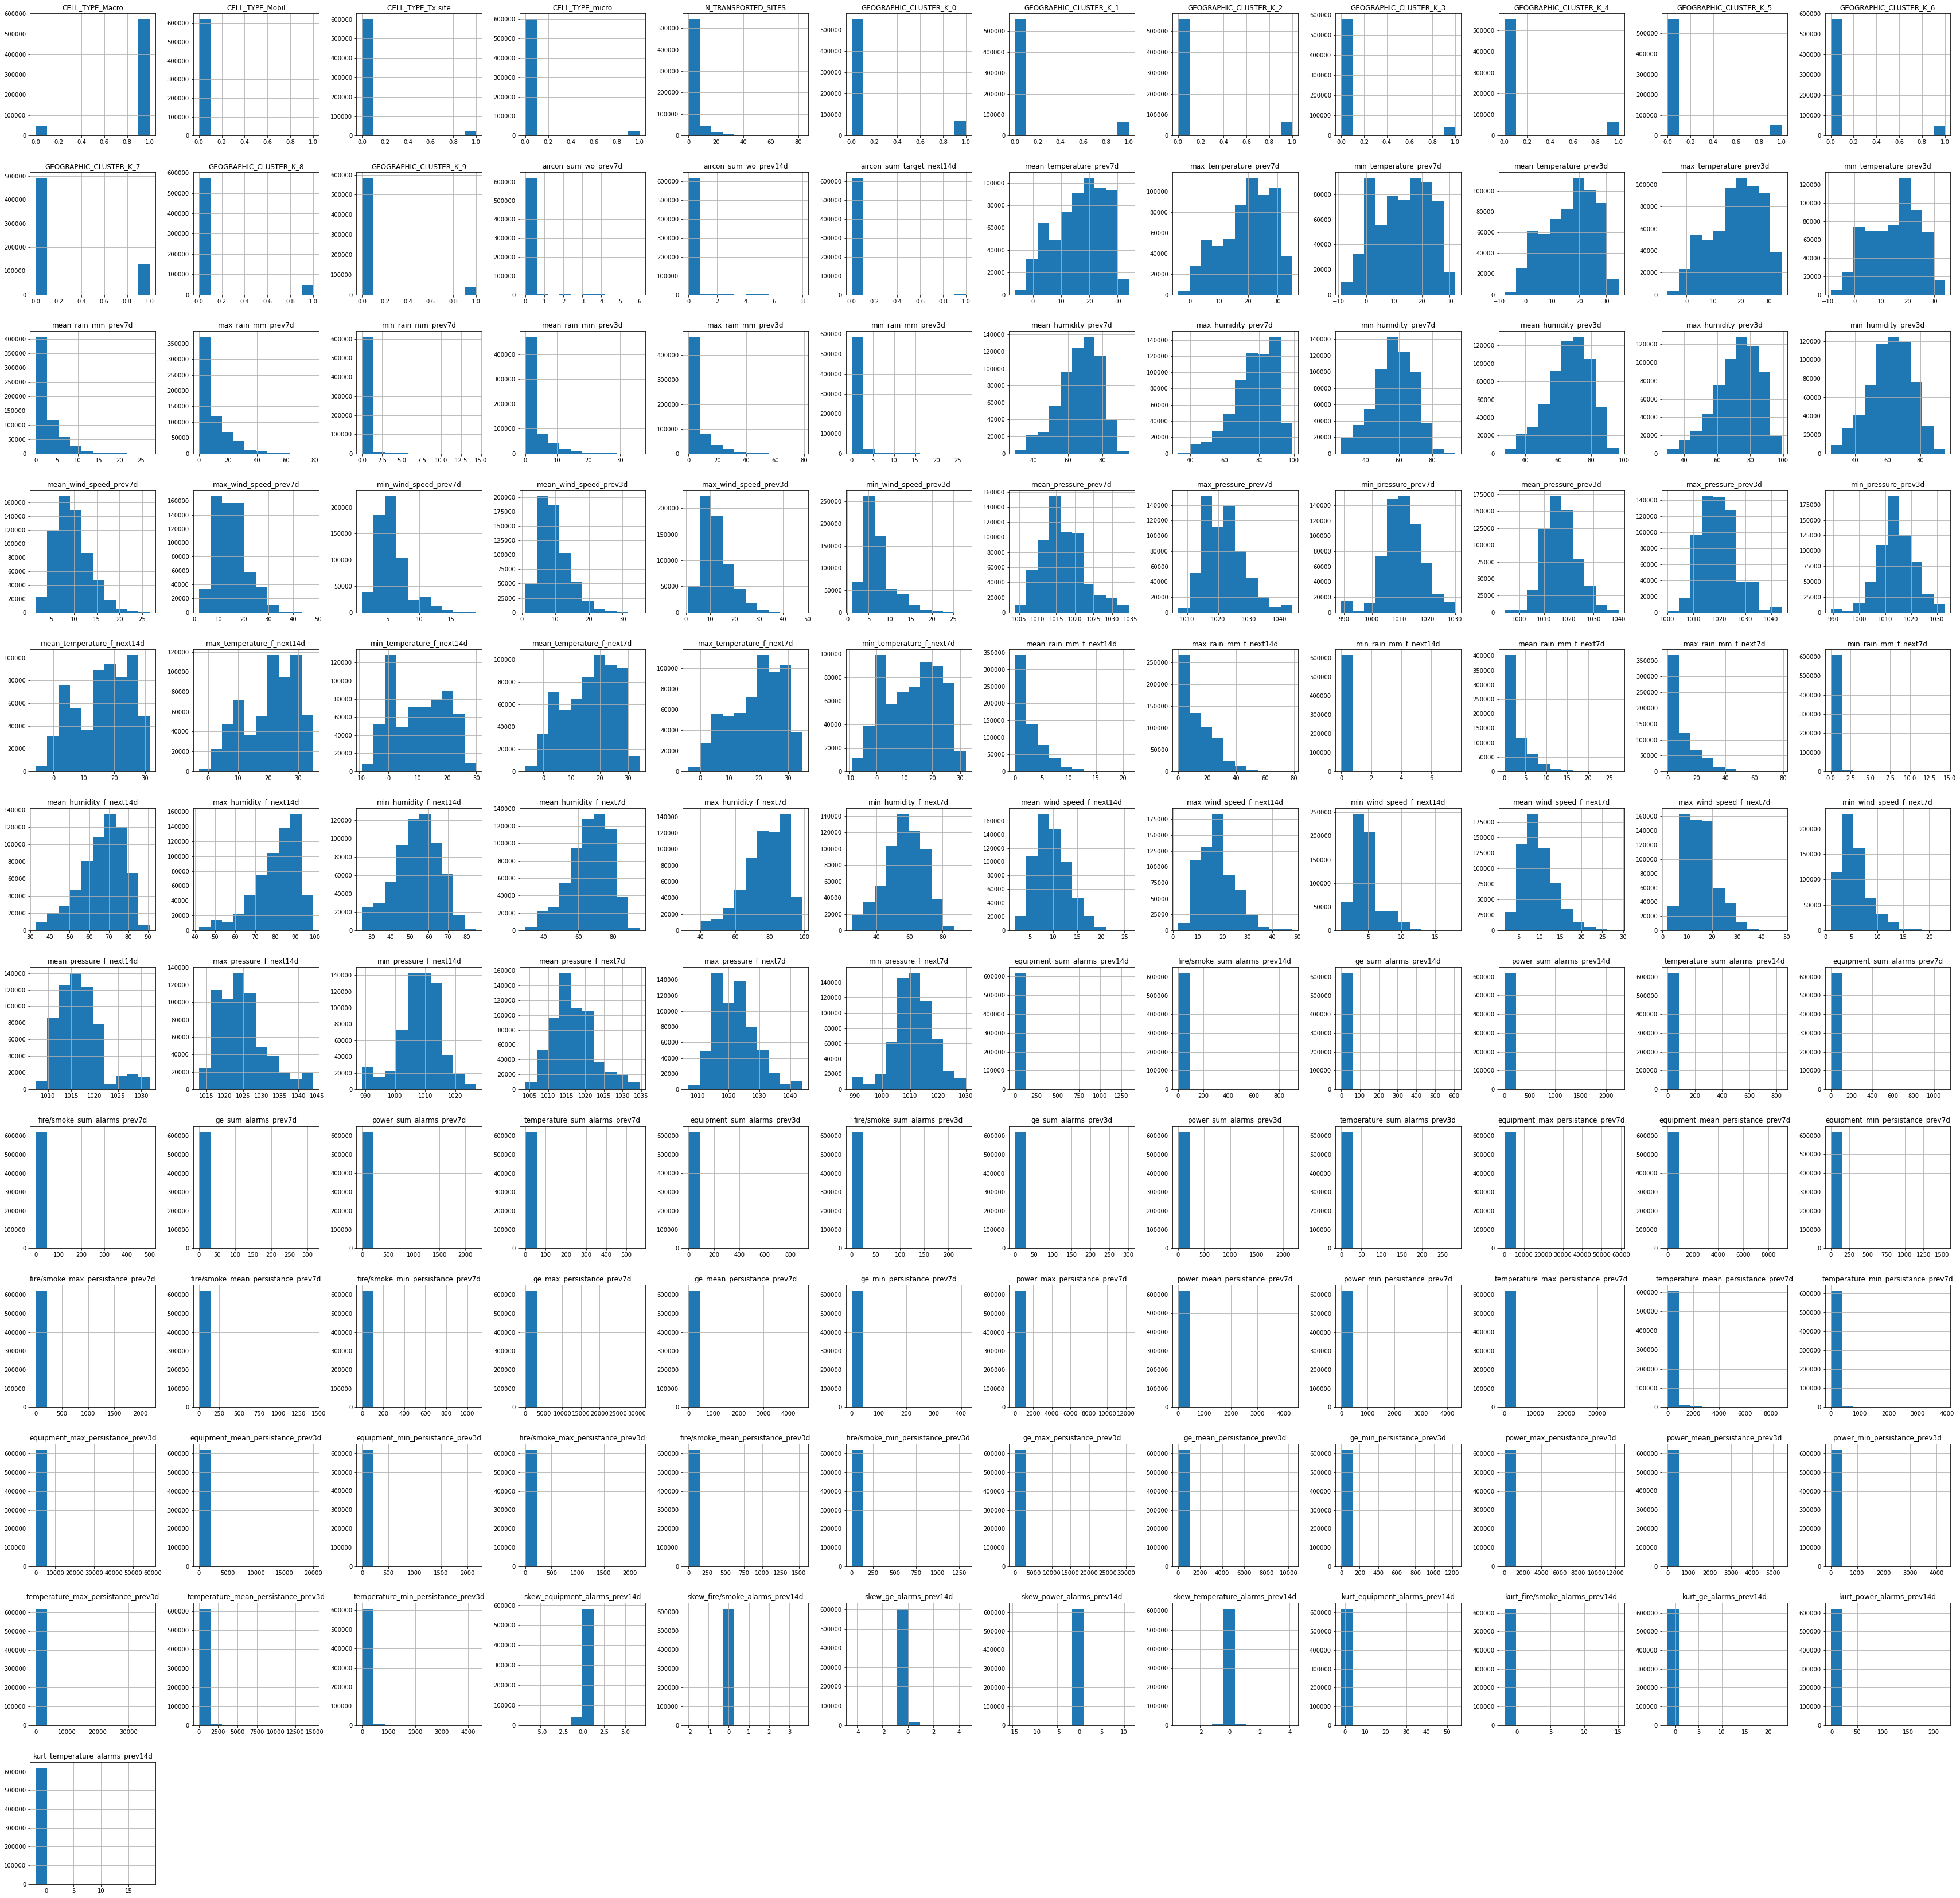

In [20]:
df.hist(figsize = (60,60))

as we can see all the datas does not have Gaussian like distibution so using the 'yeo-johnson' we make them as much as possible to gain the Gaussian like distribution.

since our categorical data had the one hot encoding transformation we need to remove the 

In [21]:
new_data = df.copy(deep=True)
new_data = new_data.drop(columns= ['CELL_TYPE_Macro','CELL_TYPE_Mobil','CELL_TYPE_Tx site','CELL_TYPE_micro','GEOGRAPHIC_CLUSTER_K_0','GEOGRAPHIC_CLUSTER_K_1','GEOGRAPHIC_CLUSTER_K_2','GEOGRAPHIC_CLUSTER_K_3','GEOGRAPHIC_CLUSTER_K_4','GEOGRAPHIC_CLUSTER_K_5','GEOGRAPHIC_CLUSTER_K_6','GEOGRAPHIC_CLUSTER_K_7','GEOGRAPHIC_CLUSTER_K_8','GEOGRAPHIC_CLUSTER_K_9'])
new_data_np = power_transform(new_data, method = 'yeo-johnson')
new_data_pd = pd.DataFrame(new_data_np, columns =new_data.columns)

array([[<AxesSubplot:title={'center':'N_TRANSPORTED_SITES'}>,
        <AxesSubplot:title={'center':'aircon_sum_wo_prev7d'}>,
        <AxesSubplot:title={'center':'aircon_sum_wo_prev14d'}>,
        <AxesSubplot:title={'center':'aircon_sum_target_next14d'}>,
        <AxesSubplot:title={'center':'mean_temperature_prev7d'}>,
        <AxesSubplot:title={'center':'max_temperature_prev7d'}>,
        <AxesSubplot:title={'center':'min_temperature_prev7d'}>,
        <AxesSubplot:title={'center':'mean_temperature_prev3d'}>,
        <AxesSubplot:title={'center':'max_temperature_prev3d'}>,
        <AxesSubplot:title={'center':'min_temperature_prev3d'}>,
        <AxesSubplot:title={'center':'mean_rain_mm_prev7d'}>],
       [<AxesSubplot:title={'center':'max_rain_mm_prev7d'}>,
        <AxesSubplot:title={'center':'min_rain_mm_prev7d'}>,
        <AxesSubplot:title={'center':'mean_rain_mm_prev3d'}>,
        <AxesSubplot:title={'center':'max_rain_mm_prev3d'}>,
        <AxesSubplot:title={'center':'min_r

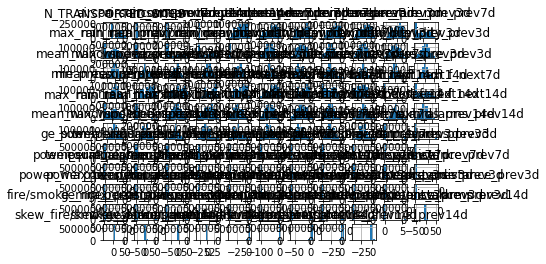

In [22]:
new_data_pd.hist(figsize=(60,60))

### 3.4 feature aggregation 

Split the origin DataFrame to subdataframes and sort them according to the duration days (3,7,14)

In [25]:
categorical_df = df.loc[: ,'CELL_TYPE_Macro':'CELL_TYPE_micro'] + df.loc[: ,'GEOGRAPHIC_CLUSTER_K_0':'GEOGRAPHIC_CLUSTER_K_9']
aircon_sum_wo_df = df.loc[:, 'aircon_sum_wo_prev7d' : 'aircon_sum_target_next14d']
N_TRANSPORTED_SITES_df = df.loc[:,'N_TRANSPORTED_SITES']
Numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']
Numerical_df = Numerical_df.reindex(sorted(Numerical_df.columns, reverse=True), axis=1)
alarm_df = df.loc[: , 'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
persistance_df = (df.loc[:, 'equipment_max_persistance_prev7d': 'temperature_min_persistance_prev3d'])
persistance_df = persistance_df.reindex(sorted(persistance_df.columns, reverse=True), axis=1)
skewKurt_df = df.loc[:,'skew_equipment_alarms_prev14d': 'kurt_temperature_alarms_pweekday']

KeyError: 'kurt_temperature_alarms_pweekday'

In [26]:
numerical_dic = {'aircon_sum_wo_prev':0, 'temperature_prev7d':3,'temperature_prev3d':6, 'rain_mm_prev7d': 9, 'rain_mm_prev3d': 12, 'humidity_prev7d' : 15,'humidity_prev3d':18, 'wind_speed_prev7d':21 , 'wind_speed_prev3d':24, 'wind_speed_prev7d' : 27, 'wind_speed_prev3d': 30, 'pressure_prev7d':33, 'pressure_prev3d': 36, 'temperature_f_next14d': 39, 'temperature_f_next7d': 42, 'rain_mm_f_next14d':45, 'rain_mm_f_next7d':48, 'humidity_f_next14d':51, 'humidity_f_next7d' : 54, 'speed_f_next14d':57, 'speed_f_next7d':60, 'pressure_f_next14d':63, 'pressure_f_next7d':66,       }


In [29]:
New_Numerical = new_numerical_df(numerical_dic, Numerical_df)

KeyError: "['aircon_sum_wo_prev7d' 'aircon_sum_wo_prev14d'] not found in axis"

In [77]:
# defining the targer and input
target_variable = 'aircon_sum_target_next14d'
input_variables = df.columns[df.columns!=target_variable]

X = df[input_variables]
y = df[target_variable]

In [78]:
# seed the random set to be consistant 
np.random.seed(1234)
# do the train test splitting
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,\
    test_size= 1/3.0, random_state =1234, shuffle=True)
# cross validation using k-fold here 10
crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

2- do two different set for standardization and normalization for sake of comparison

In [8]:
st_x= StandardScaler()
X_train_standard = st_x.fit_transform(X_train) 
X_test_standard = st_x.fit_transform(X_test) 

In [37]:
norm_x = MinMaxScaler()
X_train_norm = norm_x.fit_transform(X_train)
X_test_norm = norm_x.fit_transform(X_test)

# Section 4
specifying the model and train

In [10]:
n_estimators = 50

methods = {
#     'Lasso':LogisticRegression(penalty="l1",C=100, random_state=1234, max_iter=300, solver="liblinear"),
#     'NaiveBayes':GaussianNB(),
#     'k-NN(5)':KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree'),
    'Decision Tree':DecisionTreeClassifier(max_depth=None),
#     'Bagging(Tree)':BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators),
#     'Bagging(kNN)':BaggingClassifier(KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree'),n_estimators=n_estimators),
#     'Random Forest':RandomForestClassifier(n_estimators=n_estimators,max_depth=3,oob_score=True),
#     'Extremely Randomized Trees':ExtraTreesClassifier(n_estimators=n_estimators,max_depth=3),
#     'Ada Boost':AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators)
}

## Desision Tree
here we do three different comparisions 

In [20]:
train_model(methods, X_train, y_train, X_test, y_test)

                           Decision Tree
	  Accuracy (CV) 0.996 0.000
	Accuracy (Test) 0.517
	      Precision 0.517
	      Recall    0.468
	      F1        0.492




In [31]:
train_model(methods, X_train_standard,y_train, X_test_standard, y_test)

                           Decision Tree
	  Accuracy (CV) 0.996 0.000
	Accuracy (Test) 0.269
	      Precision 0.269
	      Recall    0.401
	      F1        0.322




In [38]:
train_model(methods, X_train_norm,y_train, X_test_norm, y_test)

                           Decision Tree
	  Accuracy (CV) 0.996 0.000
	Accuracy (Test) 0.219
	      Precision 0.219
	      Recall    0.263
	      F1        0.239




## Result 
based on these three evaluation normalization is not a good approach for tree if we want to use tree we have to think of better cleaning the features. 